## Table of Contents
* [Convolutions](#convolutions)
* [CosineAnnealing learning rate scheduler](#cosine_annealing)
* [CosineAnnealingWarmRestarts Learning Rate Scheduler](#cosine_warm_restart)
* [OneCycleLR Learning Rate Scheduler](#one_cycle)

### [Convolutions](#convolutions)
Convolution is a mathematical operation that combines two functions to produce a third function. In the context of computer vision, the convolution operation involves sliding a filter (also known as a kernel) over an image to produce a feature map.

**Key components:**
1. Image (Input Matrix):
    - A 2D array (or matrix) of pixel values representing the input image. For a grayscale image, it's a single matrix. For a color image, it's a 3D matrix with depth corresponding to the color channels (RGB).
2. Kernel (Filter):
    - A smaller 2D matrix of weights (e.g., 3x3, 5x5) that is used to scan the image. The filter's purpose is to detect specific features such as edges, textures, or patterns.
3. Feature Map (Output Matrix):
    - The result of the convolution operation, which highlights the presence of specific features in the input image.

**Convolution Process:**
1. Sliding the Filter:
    - The filter is moved across the image in a sliding window fashion, starting from the top-left corner to the bottom-right corner.
2. Element-wise Multiplication:
    - For each position of the filter on the image, element-wise multiplication is performed between the filter and the corresponding image patch.
3. Summation:
    - The results of the element-wise multiplication are summed up to produce a single value, which is placed in the corresponding position of the feature map.
4. Stride and Padding:
    - Stride: Determines how much the filter moves at each step. A stride of 1 means the filter moves one pixel at a time. A larger stride results in a smaller feature map.
    - Padding: Adds a border of zeros around the image to control the size of the feature map. Without padding, the feature map becomes smaller than the input image. Padding helps preserve the spatial dimensions.

#### Example
Consider a 3x3 filter and a 5x5 image:

Filter: 

1  0  -1<br/>
1  0  -1<br/>
1  0  -1<br/>

Image:

3  4  1  2  5 <br/>
5  6  2  1  3 <br/>
1  2  3  4  6 <br/>
6  7  5  4  2 <br/>
3  2  1  6  5 <br/>

Place the filter on the top-left corner of the image.Perform element-wise multiplication and sum the results:

(3x1 + 4x0 + 1x(-1)) + (5x1 + 6x0 + 2x(-1)) + (1x1 + 2x0 + 3x(-1)) <br/>
= 3 + 0 - 1 + 5 + 0 - 2 + 1 + 0 - 3 <br/>
= 3 - 1 + 5 - 2 + 1 - 3 <br/>
= 3 <br/>

Move the filter to the right by one pixel (stride = 1) and repeat the process until the entire image is covered.

#### CosineAnnealing learning rate scheduler <a id="cosine_annealing"></a>

The CosineAnnealing learning rate scheduler is a popular learning rate scheduling technique used in deep learning. It's a variant of the annealing schedule, which is inspired by the annealing process in metallurgy. Here's a detailed explanation of how it works:

**Motivation:**
- The initial learning rate is high to allow for rapid exploration of the weight space.
- As training progresses, the learning rate is reduced to avoid overshooting the optimal weights.

**CosineAnnealing Schedule:**
- The learning rate is annealed (reduced) using a cosine function.
- The annealing process is applied over a specified number of epochs (T_max).
- The learning rate at each epoch (t) is calculated as: <br/>
    lr_t = lr_min + 0.5 * (lr_max - lr_min) * (1 + cos(pi * t / T_max))

where:
- lr_t is the learning rate at epoch t
- lr_min is the minimum learning rate (usually set to a small value)
- lr_max is the initial learning rate
- T_max is the maximum number of epochs for annealing
- t is the current epoch

**Key Properties:**
1. The learning rate starts at lr_max and decreases as the training progresses.
2. The decrease is slow at the beginning and rapid towards the end of the annealing process.
3. The learning rate reaches lr_min at the end of the annealing process (t = T_max).

Example:
- lr_max = 0.1, lr_min = 0.001, T_max = 50
- At epoch 0, lr_0 = 0.1 (initial learning rate)
- At epoch 25, lr_25 = 0.055 (midpoint of annealing process)
- At epoch 50, lr_50 = 0.001 (minimum learning rate)

The CosineAnnealing schedule allows for a smooth and gradual decrease in the learning rate, which helps to:
1. Avoid overshooting the optimal weights
2. Converge to a better minimum
3. Improve generalization performance

This scheduler is widely used in deep learning frameworks like PyTorch and TensorFlow, and is often combined with other scheduling techniques, such as warm restarts, to further improve training dynamics.

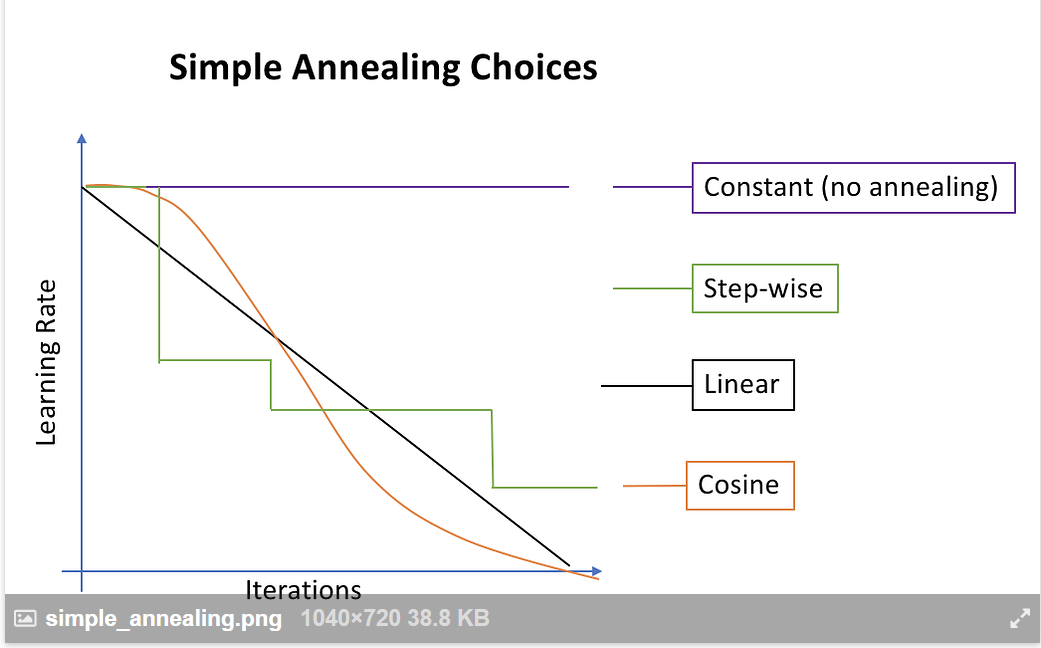

#### CosineAnnealingWarmRestarts Learning Rate Scheduler <a id="cosine_warm_restart"></a>

The `CosineAnnealingWarmRestarts` learning rate scheduler in PyTorch adjusts the learning rate dynamically during training, leveraging cosine annealing combined with periodic restarts to potentially achieve better convergence. This approach is inspired by the cyclical learning rate (CLR) method and can help escape local minima and improve generalization.

The `CosineAnnealingWarmRestarts` scheduler modulates the learning rate following a cosine function, with periodic warm restarts. This means the learning rate will decrease following a cosine curve to a minimum value and then jump back to a higher value at certain intervals (the "restarts").

#### Key Components

1. **Initial Learning Rate (`lr`)**: The starting learning rate for the optimizer.
2. **First Restart Period (`T_0`)**: The number of epochs (or iterations) before the first restart.
3. **Multiplicative Factor (`T_mult`)**: Factor by which the restart period grows after each restart.
4. **Minimum Learning Rate (`eta_min`)**: The lower bound on the learning rate after cosine annealing.
5. **Decay Factor (`gamma`)**: Decay factor applied to the learning rate after each restart.

#### How It Works

1. **Cosine Annealing**: During each period between restarts, the learning rate follows a cosine decay pattern from the initial learning rate to $\eta_{\text{min}}$. The learning rate at any time `t` can be expressed as:

    $$
    \text{lr}(t) = \eta_{\text{min}} + \frac{1}{2} (\eta_{\text{max}} - \eta_{\text{min}}) \left(1 + \cos\left(\frac{T_{\text{cur}}}{T_{\text{i}}} \pi\right)\right)
    $$

    where:
    - $ \eta_{\text{max}} $ is the initial learning rate.
    - $ T_{\text{i}} $ is the number of epochs between two warm restarts 
    - $ T_{\text{cur}} $ is the current annealing cycle length (i.e., the number of epochs since the last restart). T_cur = t

    When $T_{\text{cur}}$ = $T_{\text{i}}$ set $\eta_{\text{t}}$=$\eta_{\text{min}}$. When $T_{\text{cur}}$ = 0 after restart set $\eta_{\text{t}}$=$\eta_{\text{max}}$

2. **Warm Restarts**: After each period, the learning rate jumps back to a higher value (usually the initial learning rate), and the period length can increase by a factor of `T_mult`. This process repeats for the number of periods defined.


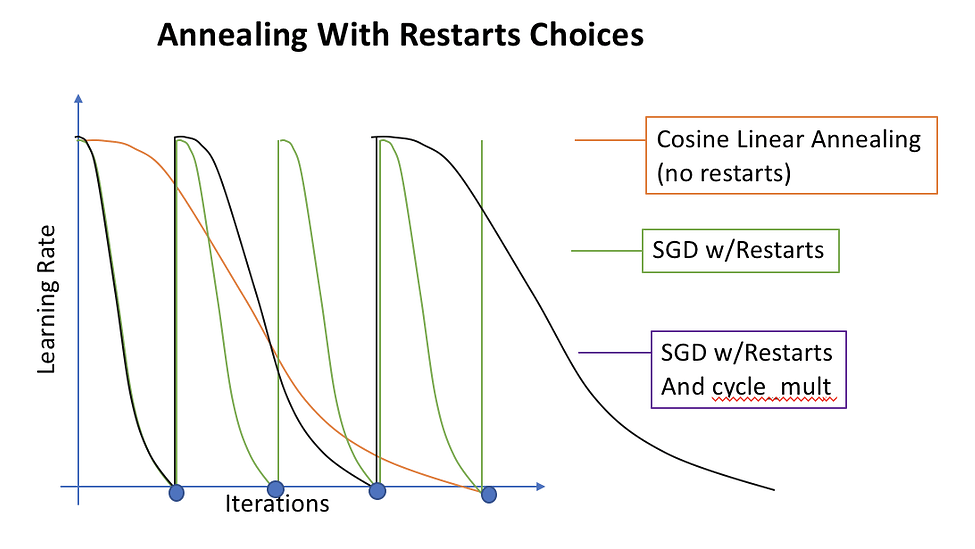

/home/bk_anupam/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


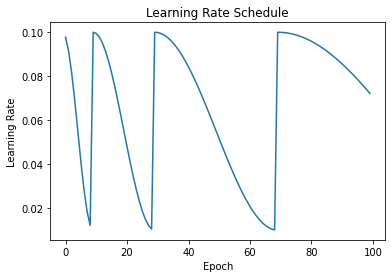

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Example model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.fc(x)

# Instantiate the model
model = SimpleModel()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Set up the CosineAnnealingWarmRestarts scheduler
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.01)

# Example training loop
num_epochs = 100
learning_rates = []

for epoch in range(num_epochs):
    for batch in range(10):  # Assume 10 batches per epoch
        # Simulate a training step
        optimizer.zero_grad()
        output = model(torch.randn(5, 10))  # Example batch
        loss = F.mse_loss(output, torch.randn(5, 1))  # Example target
        loss.backward()
        optimizer.step()
    
    # Step the scheduler (after each epoch)
    scheduler.step()
    
    # Record the learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])

# Plot the learning rates
plt.plot(learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

#### OneCycleLR Learning Rate Scheduler <a id="one_cycle"></a>
The OneCycleLR scheduler is a learning rate scheduler that dynamically adjusts the learning rate over the course of training. It was introduced in the paper "One Cycle Learning Rate Scheduler" by Leslie Smith. Here's a detailed explanation of how it works:

**Main Idea:**
- The learning rate is annealed over the course of training, with a single cycle of annealing.
- The cycle consists of three phases: warm-up, annealing, and cool-down.

**Warm-up Phase:**
- The learning rate starts at a small value (lr_min) and increases linearly to a maximum value (lr_max) over a specified number of epochs (warmup_epochs).
- This phase helps the model adapt to the initial learning rate.

**Annealing Phase:**
- After the warm-up phase, the learning rate is annealed using a cosine function over the remaining epochs (anneal_epochs).
- The annealing phase reduces the learning rate from lr_max to lr_min.

**Cool-down Phase:**
- The learning rate is held constant at lr_min for a specified number of epochs (cooldown_epochs).
- This phase allows the model to converge to a stable minimum.

**Key Properties:**
- The entire cycle (warm-up, annealing, and cool-down) is completed over a fixed number of epochs (total_epochs).
- The learning rate is updated at each step based on the current phase.

**Formula:**

The learning rate (lr) at epoch t is calculated as: <br/>

lr_t = lr_min + (lr_max - lr_min) * f(t)

where f(t) is a piecewise function that depends on the current phase:
- Warm-up phase: f(t) = t / warmup_epochs
- Annealing phase: f(t) = 0.5 * (1 + cos(pi * (t - warmup_epochs) / anneal_epochs))
- Cool-down phase: f(t) = 0

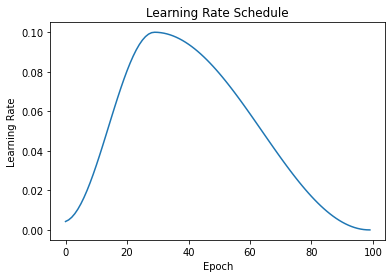

In [3]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Example model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)
    
    def forward(self, x):
        return self.fc(x)

# Instantiate the model
model = SimpleModel()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Set up the OneCycleLR scheduler
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer,    
    max_lr=0.1, # peak learning rate
    steps_per_epoch=10, # used to calculate total number of training steps
    epochs=100, # total number of training epochs
    pct_start=0.3, #  30% of the total steps will be used to increase the learning rate.
    anneal_strategy='cos', # cosine annealing strategy
    # cycle_momentum=True enables momentum cycling between base_momentum=0.85 and max_momentum=0.95.
    cycle_momentum=True, 
    base_momentum=0.85,
    max_momentum=0.95,
    # div_factor=25.0 and final_div_factor=1e4 define the initial and minimum learning rates.
    div_factor=25.0,
    final_div_factor=1e4
)

# Example training loop
num_epochs = 100
learning_rates = []

for epoch in range(num_epochs):
    for batch in range(10):  # Assume 10 batches per epoch
        # Simulate a training step
        optimizer.zero_grad()
        output = model(torch.randn(5, 10))  # Example batch
        loss = F.mse_loss(output, torch.randn(5, 1))  # Example target
        loss.backward()
        optimizer.step()
        # the learning rate is changed at each training step
        scheduler.step()
    
    # Record the learning rate
    learning_rates.append(optimizer.param_groups[0]['lr'])

# Plot the learning rates
plt.plot(learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()


In [2]:
torch.randn(5, 1)

tensor([[ 1.4089],
        [-1.3290],
        [-0.2382],
        [ 0.3585],
        [ 0.4971]])